# Assignment - Data Visulalization / Exploratory Data Analysis

## Data Collection and Data Cleaning

In [1]:
#importing all the packages required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
data = pd.read_csv('datasets/phone_dataset_cleaned.csv')
data.head()

,3G_bands,4G_bands,GPRS,EDGE,thickness,weight_g,SIM,display_size,display_ppi,n_cores,internal_memory,RAM,primary_camera,secondary_camera,battery,approx_price
0,1,1,1,1,9.4,260.0,2,7.0,209.80,4,32,2.0,13,2,3400.0,14441
1,1,1,1,1,8.5,169.0,2,5.5,400.53,8,32,3.0,13,5,4080.0,21237
2,1,1,1,1,8.5,166.0,3,5.5,267.02,8,32,3.0,13,13,4020.0,19538
3,1,1,1,1,8.4,125.0,2,5.0,293.72,4,8,1.0,8,5,2000.0,9344
4,1,1,1,1,8.4,150.0,2,5.5,400.53,6,32,3.0,21,8,2870.0,18689


## Checking Numerical and categorical data

In [3]:
#check datatype
data.dtypes

3G_bands              int64
4G_bands              int64
GPRS                  int64
EDGE                  int64
thickness           float64
weight_g            float64
SIM                   int64
display_size        float64
display_ppi         float64
n_cores               int64
internal_memory       int64
RAM                 float64
primary_camera        int64
secondary_camera      int64
battery             float64
approx_price          int64
dtype: object

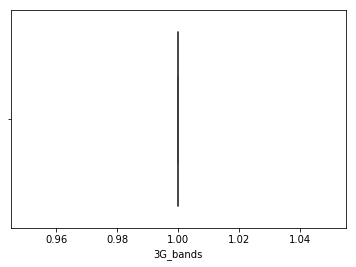

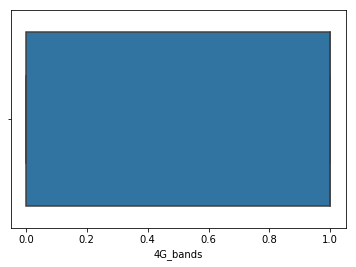

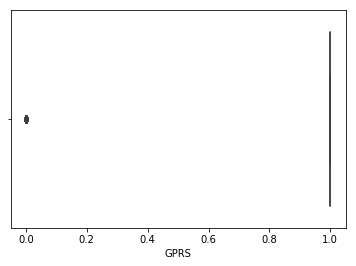

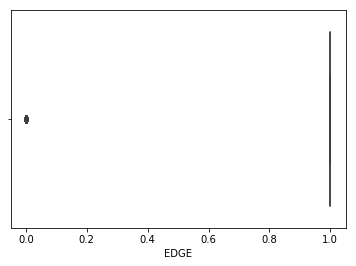

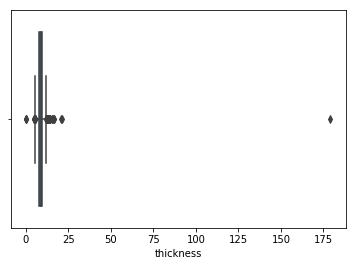

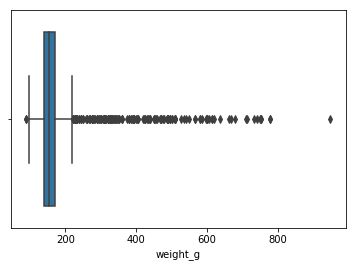

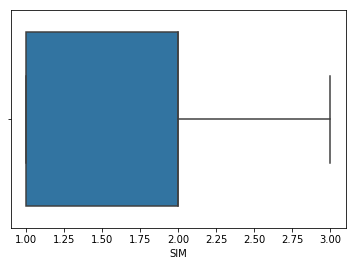

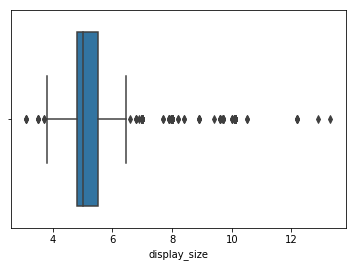

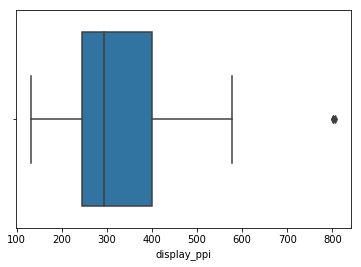

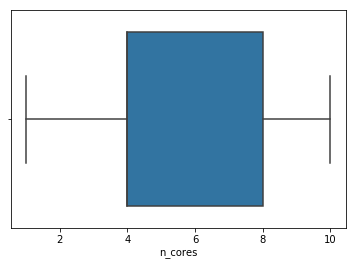

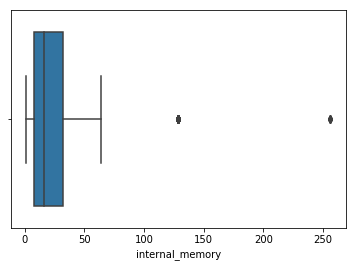

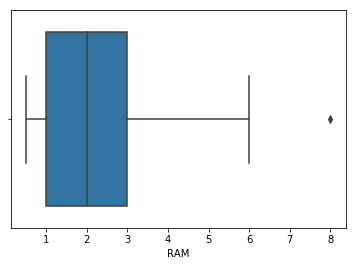

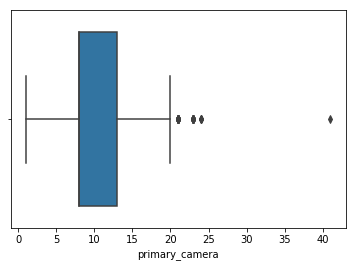

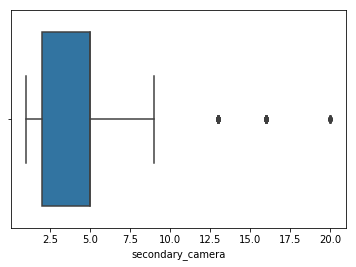

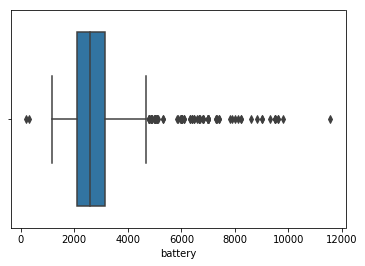

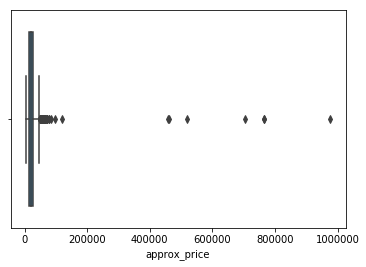

In [4]:
# boxplot to describe the data of columns
for i in data.describe().columns:
    sns.boxplot(data[i])
    plt.show()

# Removing OUTLIERS

In [5]:
for i, row in data.iterrows():
    if row['thickness']>50 or row['thickness']<1:
        data = data.drop(i)
    if row['approx_price']>200000:
        data = data.drop(i)
    # Removing the outlier of battery
    if row['battery']<500:
        data = data.drop(i)

#### thickness can't be more than 50mm or less than 1mm
#### Price should not be greater than 200000
#### Battery Capacity should not be less than 500mah

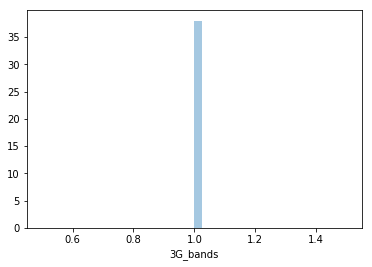

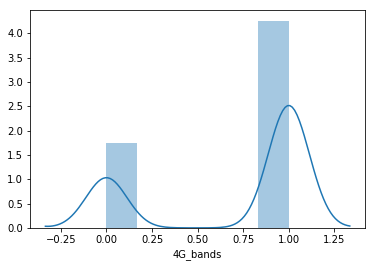

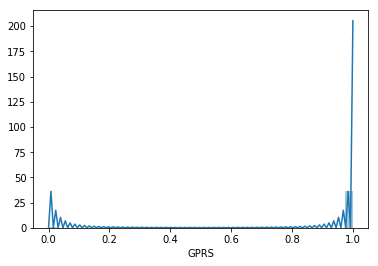

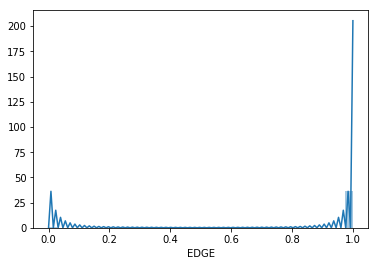

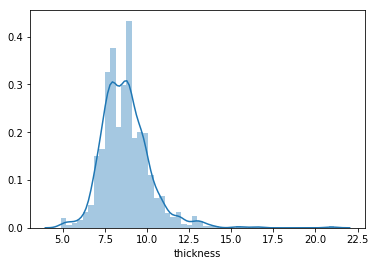

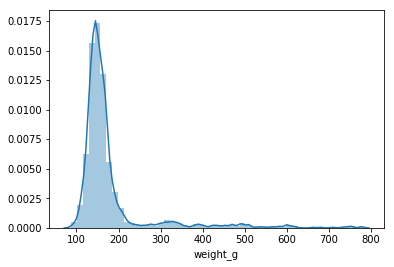

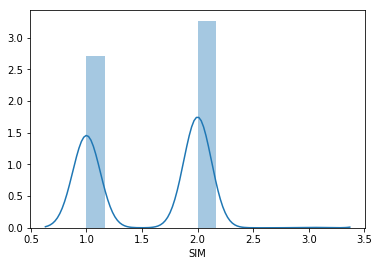

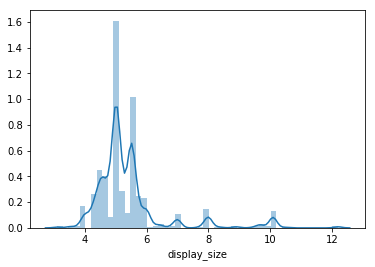

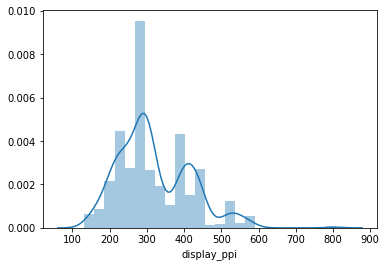

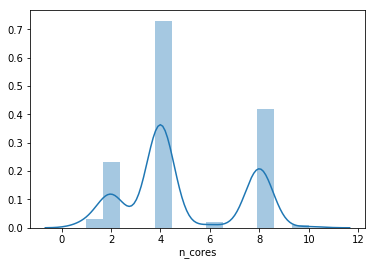

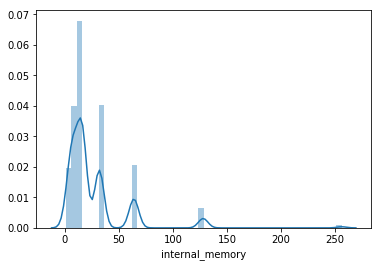

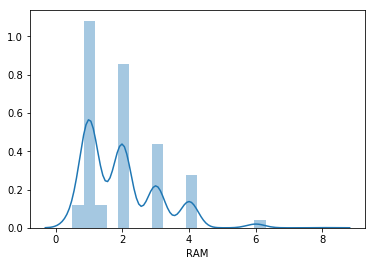

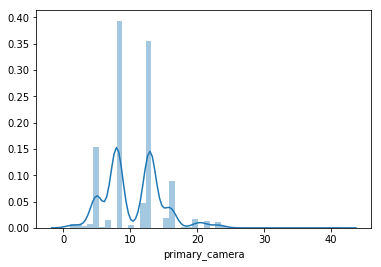

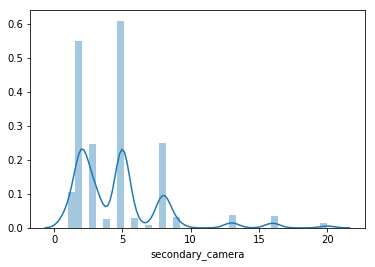

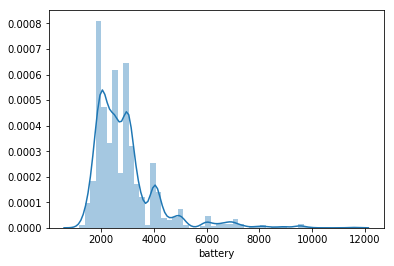

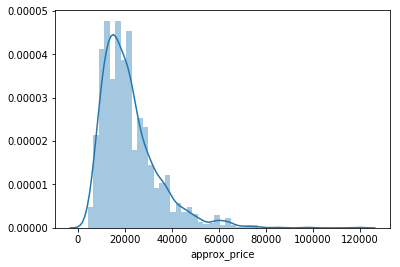

In [7]:
# distplot to describe the data of columns
for i in data.describe().columns:
    sns.distplot(data[i])
    plt.show()

# Univariate Analysis

## 1. Distribution of RAM

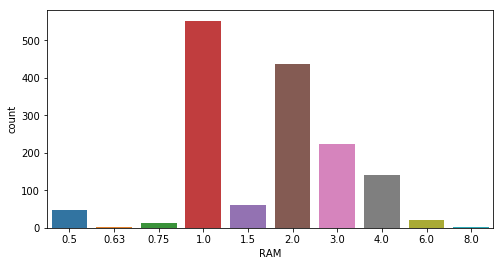

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(data.RAM)

#### It depicts that 1GB and 2GB RAM mobiles are larger in number

## 2. Distribution of Primary Camera

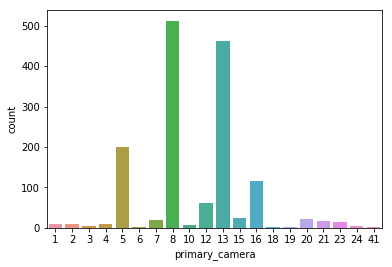

In [9]:
sns.countplot(data.primary_camera)

#### It depicts that 8MP and 13MP Primary Camera mobiles are larger in number

## 3. Distribution of Secondary Camera

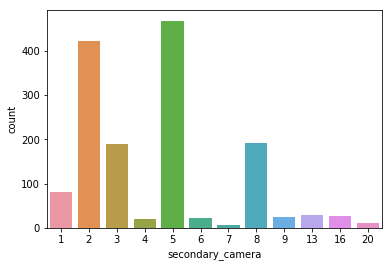

In [10]:
sns.countplot(data.secondary_camera)

#### It depicts that 2MP and 5MP Secondary Camera mobiles are larger in number

## 4. Distribution of Battery

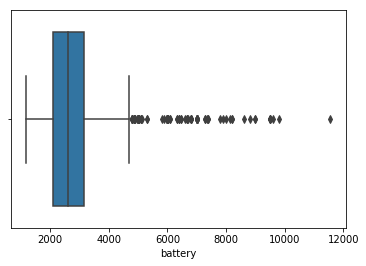

In [11]:
sns.boxplot(data.battery)

#### 25% quartile is near 2000, median is around 2500 and 75% quartile is around 3000.

## 5. Distribution of Number of Cores

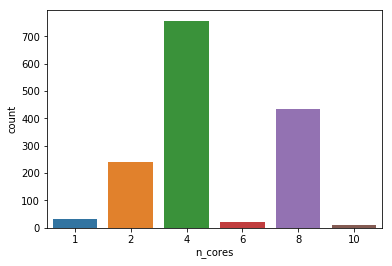

In [12]:
sns.countplot(data.n_cores)

#### It depicts that quad-core is the most demanded

# Bivariate Analysis

## Analysis of RAM and n_cores

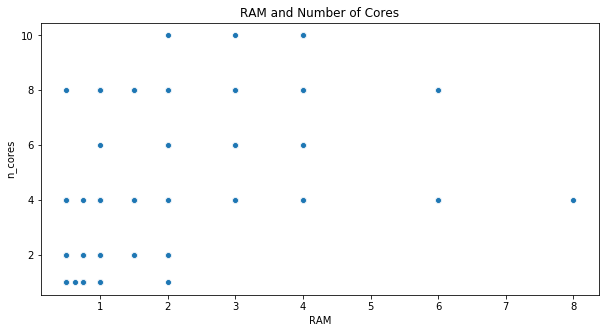

In [13]:
plt.figure(figsize=(10,5))
plt.title("RAM and Number of Cores")
plt.show(sns.scatterplot(x="RAM",y="n_cores",data=data))

## Analysis of RAM and Price

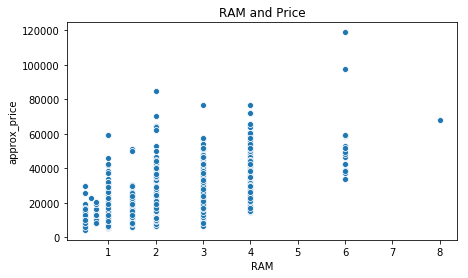

In [14]:
plt.figure(figsize=(7,4))
plt.title("RAM and Price")
sns.scatterplot(x="RAM",y="approx_price",data=data)

#### 6 GB RAM phone have highest price

## Analysis of 4G and Price

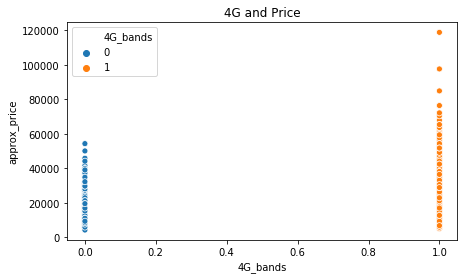

In [15]:
plt.figure(figsize=(7,4))
plt.title("4G and Price")
sns.scatterplot(x="4G_bands",y="approx_price",hue='4G_bands',data=data)

#### Phones with high price have 4G network

## Analysis of Display PPI and Price

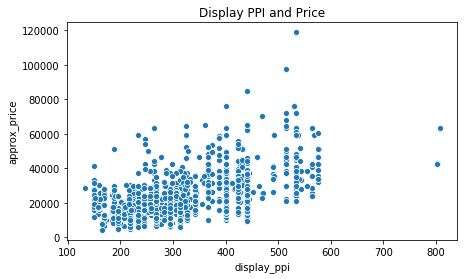

In [16]:
plt.figure(figsize=(7,4))
plt.title("Display PPI and Price")
sns.scatterplot(x="display_ppi",y="approx_price",data=data)

#### Almost all the phones have their PPI between 100 PPI and 600 PPI

## Analysis of SIM and Price

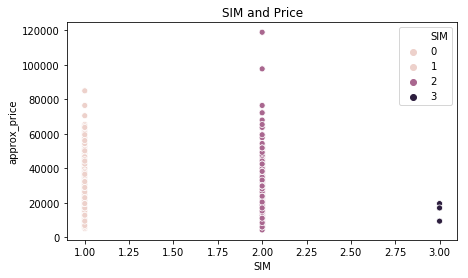

In [17]:
plt.figure(figsize=(7,4))
plt.title("SIM and Price")
sns.scatterplot(x="SIM",y="approx_price",hue='SIM',data=data)

#### Phones with Triple Sim Slot are comparatively lesser than Single Sim and Dual Sim Slot Phones

# Checking for missing Values

In [18]:
# checking for missing values
data.isnull().sum()

3G_bands            0
4G_bands            0
GPRS                0
EDGE                0
thickness           0
weight_g            0
SIM                 0
display_size        0
display_ppi         0
n_cores             0
internal_memory     0
RAM                 0
primary_camera      0
secondary_camera    0
battery             0
approx_price        0
dtype: int64

#### No missing Values in the dataframe

# Checking for OUTLIERS

In [19]:
from scipy import stats
print(stats.zscore(data.display_size))
print(min(stats.zscore(data.display_size)))
print(max(stats.zscore(data.display_size)))
for i in range(len(stats.zscore(data.display_size))):
    if stats.zscore(data.display_size)[i] == 5.978023820043913 :
        print(data.display_size[i])

[ 1.29599295  0.07908289  0.07908289 ... -0.73219049 -0.89444517
  1.29599295]
-1.8679732240969025
5.514614525191279


#### if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers

#### But here, We would not consider this as an outlier as there are Calling Tablets with display size around 13 inches

In [20]:
print(stats.zscore(data.n_cores))
print(min(stats.zscore(data.n_cores)))
print(max(stats.zscore(data.n_cores)))

[-0.374597    1.40444147  1.40444147 ... -0.374597   -1.26411624
 -1.26411624]
-1.7088758596252684
2.293960705091958


#### if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers
#### so, dataset is under OUTLIERS limit

# Build a correlation matrix to identify relevant variables ( Graph )

In [21]:
data.corr

<bound method DataFrame.corr of       3G_bands  4G_bands  GPRS  EDGE  thickness  weight_g  SIM  display_size  \
0            1         1     1     1        9.4     260.0    2          7.00   
1            1         1     1     1        8.5     169.0    2          5.50   
2            1         1     1     1        8.5     166.0    3          5.50   
3            1         1     1     1        8.4     125.0    2          5.00   
4            1         1     1     1        8.4     150.0    2          5.50   
5            1         1     1     1        9.6     142.0    2          4.50   
6            1         0     1     1        9.6     142.0    2          4.50   
7            1         1     1     1        8.9     165.0    2          5.50   
8            1         1     1     1        8.9     145.0    2          5.00   
9            1         1     1     1        8.0     110.0    2          5.00   
10           1         0     1     1        6.4     118.0    2          5.00   
11      

## Correlation Matrix

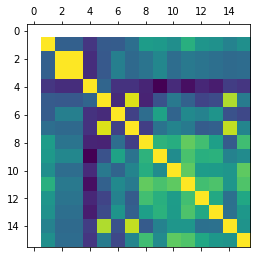

In [22]:
plt.matshow(data.corr())
plt.show()

## Correlation Matrix in the form of HeatMap

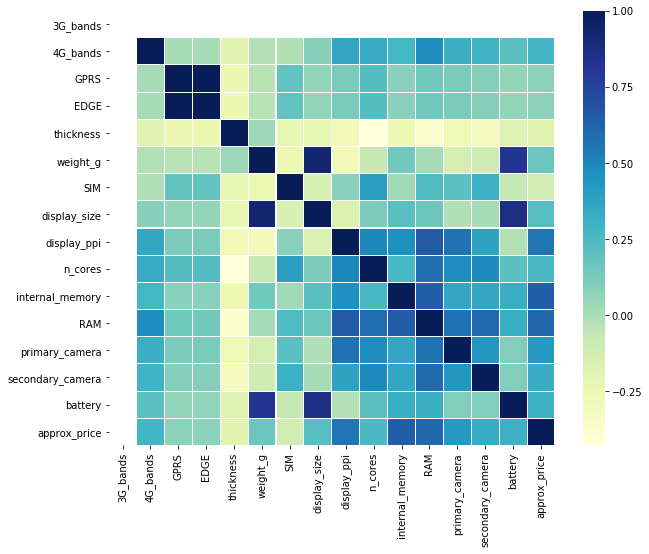

In [23]:
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(10, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

### There is strong relation between the following:
#### GPRS and EDGE
#### Weight and Display Size
#### Weight and Battery
#### Display Size and Battery

### There is weak relation between thickness and all other columns except weight(in grams)